<center>
<table style="border:none">
    <tr style="border:none">
    <th style="border:none">
        <a  href='https://colab.research.google.com/github/AmirMardan/ml_course/blob/main/6_classical_machine_learning/4_clustering_1.ipynb'><img src='https://colab.research.google.com/assets/colab-badge.svg'></a>
    </th>
    <th style="border:none">
        <a  href='https://github1s.com/AmirMardan/ml_course/blob/main/6_classical_machine_learning/4_clustering_1.ipynb'><img src='../imgs/open_vscode.svg' height=20px width=115px></a>
    </th>
    </tr>
</table>
</center>


This notebook is created by <a href='https://github.com/AmirMardan'> Amir Mardan</a>. For any feedback or suggestion, please contact me via <a href="mailto:mardan.amir.h@gmail.com">email</a>, (mardan.amir.h@gmail.com).



<a name='top'></a>
# Clustering - $k$-means

In a classification problem, we need to predict the label of a sample which is a discrete value (class).
However, we don't have any data with labels to train a clustering model.
This is the concept of letting data talk for itself.
Different algorithms try to just separate the data based on the criteria they have. $k$-means clustering requires the number of clusters.
With provided data, this method assigns samples to different clusters.
1. Based on the number of clusters, $k$-means method picks randomly a center for each cluster (centroid).
2. This method then assigns samples to the nearest centroid.
3. New centroids are defined based on the mean value of samples in each cluster for the next iteration.


This notebook will cover the following topics:

- [1. Data Preparation](#preparation)
- [2. $k$-means](#kmeans)
- [3. Evaluating $k$-Means Clustering](#evaluation)


<a id='preparation'></a>
## 1. Data Preparation

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


X:  (150, 2)
y:  (150,)


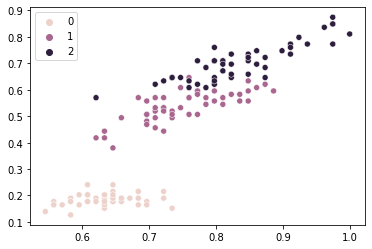

In [3]:
from sklearn.datasets import load_iris

X, y = load_iris(return_X_y=True)
X = X[:,[0, 2]]

print('X: ', X.shape)
print('y: ', y.shape)

X /= X.max()


ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)


<a id='kmeans'></a>
## 2. $k$-means

In [4]:
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score

kmeans_model = KMeans(n_clusters=3, random_state=0)
kmeans_model.fit(X)


KMeans(n_clusters=3, random_state=0)

<a name='evaluation'></a>

## 3. Evaluating $k$-Means Clustering



**Confusion Matrix**

Using confusion matrix, we can see how the model works and which labels are making trouble for the model to predict correctly.

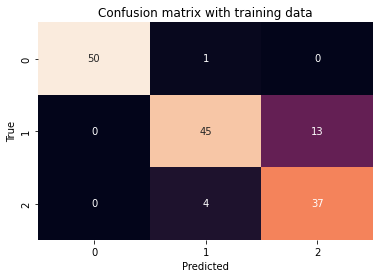

In [5]:
from sklearn.metrics import confusion_matrix

y_pred = kmeans_model.labels_

def confusion_matrix_plot(y_pred, y_true):
    ax = sns.heatmap(confusion_matrix(y_true, y_pred),
                annot=True, fmt='d', cbar=False)

    ax.set_ylabel('True')
    ax.set_xlabel('Predicted')
    ax.set_title('Confusion matrix with training data');
    
    
confusion_matrix_plot(y, y_pred)
    



**Accuracy score**

We can also measure the score of the model using `accuracy_score` which shows the best model with a score of 1.

In [6]:
from sklearn.metrics import confusion_matrix, accuracy_score


print(f'Score: {accuracy_score(y, y_pred, normalize=True)}')

Score: 0.88


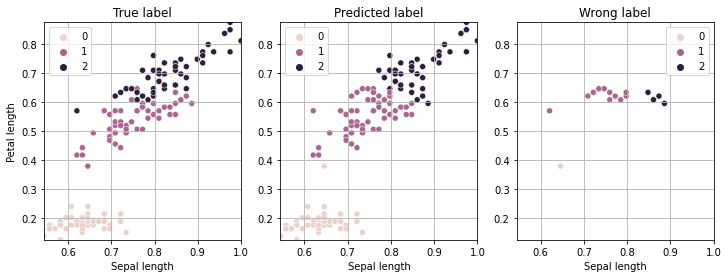

In [7]:
wrong_idx = (y != y_pred)

fig = plt.figure(figsize=(12, 4))
x_min, x_max = X[:, 0].min(), X[:, 0].max()
y_min, y_max = X[:, 1].min(), X[:, 1].max()

ax = fig.add_subplot(131)
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
ax.axis([x_min, x_max, y_min, y_max])
ax.grid()
ax.set_ylabel('Petal length')
ax.set_xlabel('Sepal length')
ax.set_title('True label')

ax = fig.add_subplot(132)
ax = sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y_pred)
ax.axis([x_min, x_max, y_min, y_max])
ax.grid()
ax.set_xlabel('Sepal length')
ax.set_title('Predicted label')

ax = fig.add_subplot(133)
ax = sns.scatterplot(x=X[wrong_idx, 0], y=X[wrong_idx, 1], hue=y_pred[wrong_idx])
ax.axis([x_min, x_max, y_min, y_max])
ax.grid()
ax.set_xlabel('Sepal length')
ax.set_title('Wrong label');

### [TOP ☝️](#top)